### COMMUNICATE DATA FINDINGS PROJECT - DATA VISUALISATION AND INTERPRETATION FOR FORD GO BIKE DATA



**By Ifeoma Onyiuke**

For this project I choose to analyse and plot visualisations for the Ford go bike dataset for 2018. THis dataset was provided by Udacity and downloaded manually from the resource centre as a `.CSV` file..
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.it contains...

The first step is to carry out Data Wrangling processes on the data to ensure it meets the requirements for Quality and Tidy Data. IN this phase a lot exploration was carried to get deeper insights on what the data looks like. In the second phase "Explanatory Phase" Various plots from "Univaraite to Multivariate" were created to give and share the insights observed in the first phase.
A slide will be prepared in conclusion to share the outcome. Target is to share finding with audience or users and ensure they get a deep understanding of the data as much as possible.

#### DATA EXPLORATION AND WRANGLING

In [134]:
#import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
from pyproj import Geod

#allows plots to be rendered directly inside the notebook
%matplotlib inline

In [135]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style> 

#### DATA ASSESSEMENT

In [136]:
#load data into a pandas dataframe
bike_data = pd.read_csv('fordgobike.csv')
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [137]:
bike_data.shape

(183412, 16)

In [138]:
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [139]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [140]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [141]:
bike_data.duplicated().sum().any()

False

## Quality Issues
* station_id should be integer not float
* end station_id should be int not float
* member birth year should be int not float
* convert start time and end time to datetime
* convert duration to hours and minutes
* member gender - Nan and others
* start_station_id contains NaN values

#### DATA CLEANING
Data assessment carried out programmatically above highlighted some issues listed. Data cleaning will be done in this section to ensure the data meets the tidiness and quality standard for visualisation.

In [142]:
#make a copy of data
bike_data_clean = bike_data

In [143]:
#convert seconds to hour minutes and seconds
#bike_data_clean['duration_hours'] = bike_data_clean['duration_hours'].astype('float64')
bike_data_clean['duration_hms'] = pd.to_datetime(bike_data_clean["duration_sec"], unit='s').dt.strftime("%H:%M:%S")

In [144]:
#create a column for minutes
bike_data_clean['duration_minutes'] = bike_data_clean["duration_sec"]/60

In [145]:
bike_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hms,duration_minutes
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,14:29:45,869.750000
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,11:48:41,708.683333
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,17:10:54,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,10:08:10,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,00:26:25,26.416667


In [146]:
bike_data_clean['duration_minutes'].value_counts()

4.533333      311
5.400000      292
5.383333      291
5.100000      291
5.083333      290
             ... 
156.516667      1
197.433333      1
68.983333       1
77.500000       1
186.616667      1
Name: duration_minutes, Length: 4752, dtype: int64

In [147]:
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

**DEFINE**

Convert start_time and end_time to datetime

**CODE**

In [148]:
#convert start and end time to datetime instead of object
bike_data_clean['start_time'] = pd.to_datetime(bike_data_clean['start_time'])
bike_data_clean['end_time'] = pd.to_datetime(bike_data_clean['end_time'])

**DEFINE**

Drop rows with missing start_station_id and end_station_id, in order to change data type to int.

**CODE**

In [149]:
#find columns with NaN station id
#bike_data_clean.query('start_station_id == "NaN"')

#remove the rows
bike_data_clean = bike_data_clean[bike_data_clean['start_station_id'].notna()]

In [150]:
#remove the rows with missing end_station_id
bike_data_clean = bike_data_clean[bike_data_clean['end_station_id'].notna()]

**TEST**

In [151]:
bike_data_clean.query('start_station_id == "NaN"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hms,duration_minutes


In [152]:
bike_data_clean.query('end_station_id == "NaN"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hms,duration_minutes


**Convert start_station_id and end_station_id from floats to integer**

In [153]:
#convert start station_id and end from floats to integer
#display(bike_data_clean.dtypes)
bike_data_clean = bike_data_clean.astype({"start_station_id":'int', "end_station_id":'int'})

**TEST**

In [154]:
display(bike_data_clean.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
duration_hms                       object
duration_minutes                  float64
dtype: object

In [155]:
bike_data_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hms,duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,14:29:45,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,11:48:41,708.683333


**DEFINE**

Convert birth year to integer. First of all remove all Nan or missing values.

**CODE**

In [156]:
bike_data_clean.query('member_birth_year == "NaN"')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hms,duration_minutes
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,11:48:41,708.683333
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252,Channing Way at Shattuck Ave,37.865847,-122.267443,244,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No,00:15:15,15.250000
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258,University Ave at Oxford St,37.872355,-122.266447,263,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No,00:10:50,10.833333
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No,00:56:58,56.966667
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13,Commercial St at Montgomery St,37.794231,-122.402923,81,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No,00:15:26,15.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.663,2019-02-01 01:42:36.878,244,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No,00:07:29,7.483333
183356,795,2019-02-01 01:25:50.366,2019-02-01 01:39:05.950,368,Myrtle St at Polk St,37.785434,-122.419622,125,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No,00:13:15,13.250000
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.645,75,Market St at Franklin St,37.773793,-122.421239,133,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No,00:11:13,11.216667
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58,Market St at 10th St,37.776619,-122.417385,75,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No,00:03:16,3.266667


In [157]:
#remove NaN values
bike_data_clean = bike_data_clean[bike_data_clean['member_birth_year'].notna()]

In [158]:
#convert year to int
bike_data_clean = bike_data_clean.astype({"member_birth_year":'int'})

**TEST**

In [159]:
#bike_data_clean.head()
display(bike_data_clean.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
duration_hms                       object
duration_minutes                  float64
dtype: object

### DATA EXPLORATION

**EXPLORE GENDER OF RIDERS**

In [160]:
#ratio of male to female riders
sorted_counts = bike_data_clean['member_gender'].value_counts()
sorted_counts

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

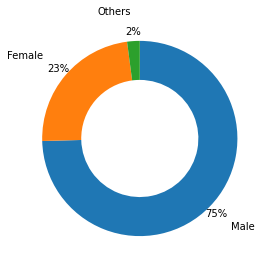

In [161]:
sorted_counts.index = ['Male', 'Female', 'Others']
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock=False, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3, wedgeprops={'width':0.4});
plt.axis('square');

75% of riders are male, according to an article I found on the internet it is expected because females are more concerned about their safety than male and also the possibility of cycling smudging their makeup or messing up their hair, females tend to avoid this means of transportation.

**Explore status of riders**

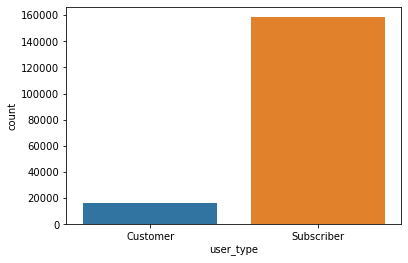

In [162]:
#plot of subscriber to non-subscribers
sns.countplot(data=bike_data_clean, x='user_type');

User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member).This also explains the duration between start time and end time. There is a possibility that having an annual subscription is cheaper than renting for short periods. Hence the high ratio of subscribers to casual users of this services.

**Explore age of riders**

compare age to user_type

In [163]:
bike_data_clean['member_birth_year'].unique()

array([1984, 1972, 1989, 1974, 1959, 1983, 1988, 1992, 1996, 1993, 1990,
       1981, 1975, 1978, 1991, 1997, 1986, 2000, 1982, 1995, 1980, 1973,
       1985, 1971, 1979, 1967, 1998, 1994, 1977, 1999, 1987, 1969, 1963,
       1976, 1964, 1965, 1961, 1968, 1966, 1962, 1954, 1958, 1960, 1970,
       1956, 1957, 1945, 1900, 1952, 1948, 1951, 1941, 1950, 1949, 1953,
       1955, 1946, 1947, 1931, 1943, 1942, 1920, 1933, 2001, 1878, 1901,
       1944, 1928, 1934, 1939, 1930, 1902, 1910, 1938, 1927])

In [164]:
bike_data_clean.query('member_birth_year == 0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hms,duration_minutes


In [166]:
#Create column for ages
bike_data_clean['member_age'] = bike_data_clean['member_birth_year'].apply(lambda x: 2018 - x)

In [167]:
bike_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hms,duration_minutes,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,14:29:45,869.750000,34
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,17:10:54,1030.900000,46
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,10:08:10,608.166667,29
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,00:26:25,26.416667,44
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,00:29:53,29.883333,59


Birth year is skewed to the left, there is not much data available. This can be intetpreted that the age range for sharers and bike users ismostly between 1980 and 2000.

**EXPLORE DAY OF WEEK**

In [168]:
bike_data_clean['start_day_of_week'] = bike_data_clean['start_time'].dt.day_name()

In [169]:
bike_data_clean['end_day_of_week'] = bike_data_clean['end_time'].dt.day_name()

In [170]:
bike_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hms,duration_minutes,member_age,start_day_of_week,end_day_of_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,14:29:45,869.750000,34,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,17:10:54,1030.900000,46,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,10:08:10,608.166667,29,Thursday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,00:26:25,26.416667,44,Thursday,Friday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,00:29:53,29.883333,59,Thursday,Friday


It is possible that some of the users that rent these bikes take them home, because calculating from the start and end time and also duration it appears to be in possession of some users for more than one day.

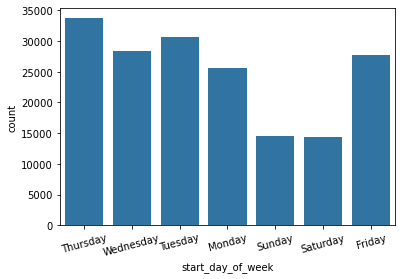

In [171]:
base_color = sns.color_palette()[0]
order = bike_data_clean.sort_values('start_day_of_week')
sns.countplot(data=bike_data_clean, x='start_day_of_week', color=base_color)
plt.xticks(rotation=15);

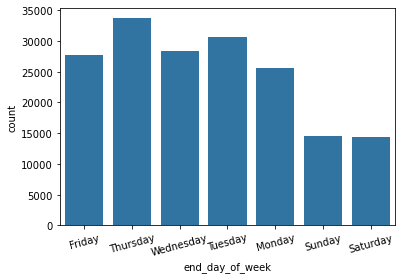

In [172]:
base_color=sns.color_palette()[0]
sns.countplot(data=bike_data_clean, x='end_day_of_week', color=base_color)
plt.xticks(rotation=15);

Thursday has the highest number of usage. 

In [173]:
count = bike_data_clean.groupby(['start_day_of_week', 'end_day_of_week']).size()
count

start_day_of_week  end_day_of_week
Friday             Friday             27611
                   Saturday              52
Monday             Monday             25604
                   Tuesday               37
Saturday           Saturday           14370
                   Sunday                44
Sunday             Monday                37
                   Sunday             14475
Thursday           Friday                44
                   Thursday           33668
Tuesday            Tuesday            30554
                   Wednesday             30
Wednesday          Thursday              39
                   Wednesday          28387
dtype: int64

**Explore months and compare average rides for each month**

In [174]:
#source:https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
bike_data_clean['start_month'] = bike_data_clean['start_time'].dt.month

In [175]:
bike_data_clean['end_month'] = bike_data_clean['end_time'].dt.month

In [176]:
#bike_data_clean['start_month'].value_counts()
count = bike_data_clean.groupby(['start_month']).size()
count

start_month
2    174952
dtype: int64

In [177]:
bike_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_hms,duration_minutes,member_age,start_day_of_week,end_day_of_week,start_month,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,1984,Male,No,14:29:45,869.750000,34,Thursday,Friday,2,3
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,17:10:54,1030.900000,46,Thursday,Friday,2,3
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,1989,Other,No,10:08:10,608.166667,29,Thursday,Friday,2,3
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,00:26:25,26.416667,44,Thursday,Friday,2,3
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,1959,Male,No,00:29:53,29.883333,59,Thursday,Friday,2,3


In [178]:
bike_data_clean.end_month.unique()

array([3, 2], dtype=int64)

This data is for only one month, February. Not possible to compare usage over several or different months.

In [179]:
#Just to be safe I created a new df for the explanatory analysis
expl_bike_data = bike_data_clean

In [181]:
expl_bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_hms,duration_minutes,member_age,start_day_of_week,end_day_of_week,start_month,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,1984,Male,No,14:29:45,869.750000,34,Thursday,Friday,2,3
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,17:10:54,1030.900000,46,Thursday,Friday,2,3
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,1989,Other,No,10:08:10,608.166667,29,Thursday,Friday,2,3
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,00:26:25,26.416667,44,Thursday,Friday,2,3
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,1959,Male,No,00:29:53,29.883333,59,Thursday,Friday,2,3


* Drop some unnecessary coulmns like: `start_time, end_time, start_station_id, end_station_id`

In [182]:
expl_bike_data.drop(columns =['duration_sec', 'start_station_id', 'end_station_id', 'start_time', 'end_time', 'member_birth_year'], inplace=True)

In [183]:
expl_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_station_name       174952 non-null  object 
 2   start_station_latitude   174952 non-null  float64
 3   start_station_longitude  174952 non-null  float64
 4   end_station_name         174952 non-null  object 
 5   end_station_latitude     174952 non-null  float64
 6   end_station_longitude    174952 non-null  float64
 7   bike_id                  174952 non-null  int64  
 8   user_type                174952 non-null  object 
 9   member_gender            174952 non-null  object 
 10  bike_share_for_all_trip  174952 non-null  object 
 11  duration_hms             174952 non-null  object 
 12  duration_minutes         174952 non-null  float64
 13  member_age               174952 non-null  int64  
 14  star

In [193]:
#expl_bike_data.head()

In [125]:
#df['start_time'] = pd.to_datetime(df['start_time'])
#bike_data_clean2['start_month_num'] = bike_data_clean2['start_time'].apply(lambda time: time.month)
#bike_data_clean2['start_month_char'] = bike_data_clean2['start_month_num'].apply(lambda x: calendar.month_abbr[x])

### possible questions
- average number of days a bike is rented(calculate the differene from start and end time)
- which gender has the highest number of rent
- age range
- longest duration of hire
- average distance travelled using start and end lat/long)
- day of the week wt more rented bike

### EXPLANATORY ANALYSIS

### Univariate Exploration

The data covered only one month, "February" for the start time and two months for the end time "February and March". 

__Age:__ Contains a lot of data, plotting the whole data makes the plot crowded as seen in plot above. Hence, I decided to pick stations with highest number of counts and then plot to see the age range for the top stations.


In [185]:
expl_bike_data.start_station_name.value_counts(ascending=False)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [186]:
#select top10 with highest counts
top10_start_stations = expl_bike_data.start_station_name.value_counts().head(10)

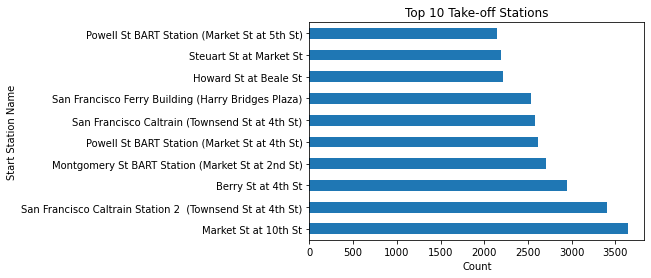

In [187]:
#plot to see the top 10 take off stations
base_color = sns.color_palette()[0]
top10_start_stations = expl_bike_data.start_station_name.value_counts()[0:10]
#sns.countplot(data=top10_start_stations, y='start_station_name', color=base_color)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 10 Take-off Stations')
top10_start_stations.plot(kind='barh', color=base_color);

In [188]:
expl_bike_data.groupby(['end_station_name']).size().sort_values(ascending=False)

end_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  5
Willow St at Vine St                                            5
Length: 329, dtype: int64

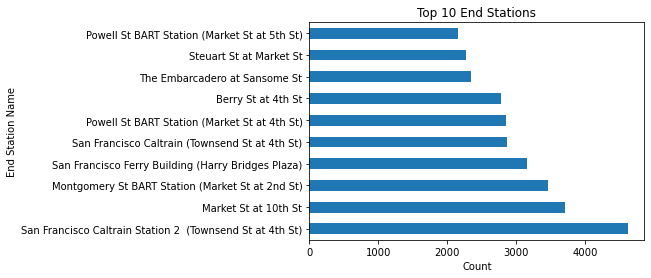

In [189]:
#plot to see the top 10 take off stations

base_color = sns.color_palette()[0]
top10_start_stations = expl_bike_data.end_station_name.value_counts()[0:10]
#sns.countplot(data=top10_start_stations, y='start_station_name', color=base_color)
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.title('Top 10 End Stations')
top10_start_stations.plot(kind='barh', color=base_color);

### SUMMARY

I used google maps to check the location of this stations and have the following findings:

* The Caltran bike station is very close the San Francisco train station. It makes sense that it has a highest number of stop location for the users.
* The Market St is within a commercial zone and lots of activities happening around this area. It is expected to have high number of users as well.



### Univariate Plot 2

Analyse the Age Distribution for riders

In [226]:
bike_data_clean.member_age.describe()

count    174952.000000
mean         33.196865
std          10.118731
min          17.000000
25%          26.000000
50%          31.000000
75%          38.000000
max         140.000000
Name: member_age, dtype: float64

In [199]:
expl_bike_data['member_age'].max()

140

In [200]:
expl_bike_data['member_age'].min()

17

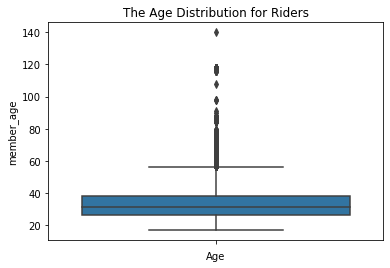

In [218]:
#plt.figure(figsize=(8,6))
sns.boxplot(y='member_age', data=expl_bike_data)
plt.title("The Age Distribution for Riders")
plt.xlabel("Age");

Age greater than 80 does not seem ideal, for this type of data. They appear as outliers on the boxplot above. Hence I will remove ages greater than 80, and replot comparing with the gender to see what the distribution will look like. 

In [220]:
#source:https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/
#select rows with age > 80
age_grt_80 = expl_bike_data.loc[expl_bike_data['member_age'] > 80]

#drop the rows
expl_bike_data = expl_bike_data.drop(age_grt_80.index, axis=0)

In [222]:
expl_bike_data.shape

(174760, 18)

In [223]:
expl_bike_data.member_age.unique()

array([34, 46, 29, 44, 59, 35, 30, 26, 22, 25, 28, 37, 43, 40, 27, 21, 32,
       18, 36, 23, 38, 45, 33, 47, 39, 51, 20, 24, 41, 19, 31, 49, 55, 42,
       54, 53, 57, 50, 52, 56, 64, 60, 58, 48, 62, 61, 73, 66, 70, 67, 77,
       68, 69, 65, 63, 72, 71, 75, 76, 17, 74, 79], dtype=int64)

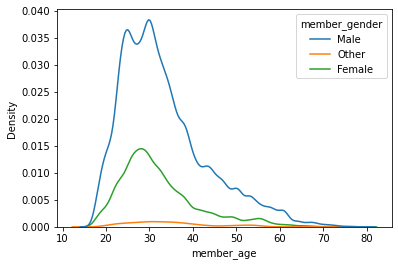

In [224]:
sns.kdeplot(data=expl_bike_data, x='member_age', hue='member_gender');

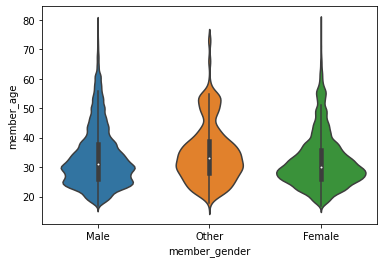

In [225]:
sns.violinplot(data=expl_bike_data, x='member_gender', y='member_age');

The plot is skewed to the right, mean age for riders is 33years. The data showed that some riders/users are upto 100years of age. This is not possible in real life and might be outliers.

In [ ]:
plt.figure(figsize=(8,6))
bins = np.arange(0, ['age'].max()+2, 2)
plt.hist(data=bike_data_clean, x='age', bins=bins)
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Age distribution of Ford GoBike data in Top 8 Station');

### RESOURCES

* https://www.counterpointresearch.com/understanding-fords-gobike-user-dynamic/
* https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/